<a href="https://colab.research.google.com/github/jonnes-nascimento/maqacel/blob/master/Forma_de_Onda_no_Gerador_S%C3%ADncrono.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise harmônica da forma de onda - Gerador Síncrono**

Como salvar notebook do Colab em html (pdf):
https://torbjornzetterlund.com/how-to-save-a-google-colab-notebook-as-html/

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft

***Carregando os dados do experimento:***

In [ ]:
dados = pd.read_csv("4.csv", skiprows=1, names=['tempo','tensao'])

x = dados['tempo']
y = dados['tensao']

num_samples = x.size

min_x=x[0]
max_x=x[x.size-1]

time = np.linspace(min_x, max_x, num_samples, endpoint=True)

***Forma de onda obtida no experimento:***

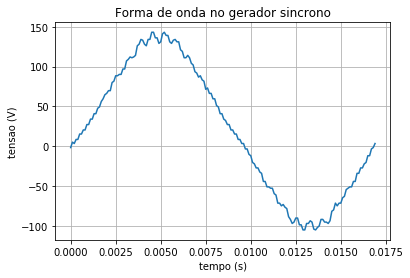

In [ ]:
plt.title("Forma de onda no gerador sincrono")
plt.xlabel("tempo (s)")
plt.ylabel("tensao (V)")

plt.plot('tempo', 'tensao', data=dados)
plt.grid()
plt.show()

***Análise harmônica da forma de onda:***

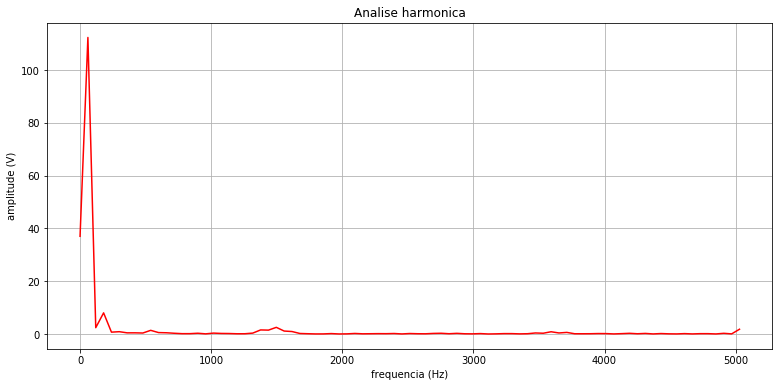

In [ ]:
harm = fft(y, time.size)
amp = abs(harm)
freq = np.linspace(0.0, 1.0 /(2.0 *((max_x-min_x)/num_samples)), time.size//2)

plt.figure(figsize=(13,6))
plt.title("Analise harmonica")
plt.xlabel("frequencia (Hz)")
plt.ylabel("amplitude (V)")
plt.plot(freq, (2/amp.size)*amp[0:amp.size//2], linewidth = 1.5, color='RED')
plt.tight_layout
plt.grid()
plt.show()

In [ ]:
df = pd.DataFrame({"freq(Hz)":freq, "amp(V)":(2/amp.size)*amp[0:amp.size//2]})

df_impares = df.iloc[1:-1:2]
df_impares_25 = df_impares[:13]

df_impares_25

,freq(Hz),amp(V)
1,59.876021,112.305209
3,179.628064,8.018598
5,299.380107,0.889877
7,419.132150,0.459385
9,538.884193,1.404137
11,658.636236,0.480998
13,778.388278,0.144220
15,898.140321,0.301301
17,1017.892364,0.351405
19,1137.644407,0.193768


***Cálculo do THD da forma de onda:***

In [ ]:
THD = np.sqrt(np.sum(np.power(df_impares_25['amp(V)'][1:13], 2))) / df_impares_25['amp(V)'][:1]

print('THD: %.2f%%' % (THD*100))

THD: 7.79%
